<a href="https://colab.research.google.com/github/mervegb/deep-learning/blob/main/training_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def generate_data(num_samples, num_features, coef=5, intercept=3, noise=0.1):
    """Generate synthetic data based on a linear relationship"""
    x = np.random.rand(num_samples, num_features)
    y = coef * x + intercept + noise * np.random.rand(num_samples, num_features)
    return x, y

# Generate and convert training data
x_train, y_train = generate_data(100, 1)
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)

# Generate and convert evaluation (test) data
x_test, y_test = generate_data(50, 1)
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test)

In [37]:
class LinearRegressionModel(nn.Module):

  def __init__(self, inputSize,outputSize):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(inputSize,outputSize)

  def forward(self,x):
   return self.linear(x)

In [41]:
# Initialize lists to save the history of the training and test losses
train_loss_history = []
test_loss_history = []

#initialize the Model
inputDim = 1
outputDim = 1

model = LinearRegressionModel(inputDim,outputDim)

#the loss (mean squared error)
loss_function = nn.MSELoss()

#optimization (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

Epoch: 0 | Train loss: 45.3820 | Test loss: 47.4615
Epoch: 10 | Train loss: 27.3915 | Test loss: 29.0047
Epoch: 20 | Train loss: 16.6219 | Test loss: 17.8708
Epoch: 30 | Train loss: 10.1728 | Test loss: 11.1385
Epoch: 40 | Train loss: 6.3089 | Test loss: 7.0552
Epoch: 50 | Train loss: 3.9919 | Test loss: 4.5689
Epoch: 60 | Train loss: 2.6006 | Test loss: 3.0470
Epoch: 70 | Train loss: 1.7632 | Test loss: 2.1093
Epoch: 80 | Train loss: 1.2575 | Test loss: 1.5263
Epoch: 90 | Train loss: 0.9502 | Test loss: 1.1597


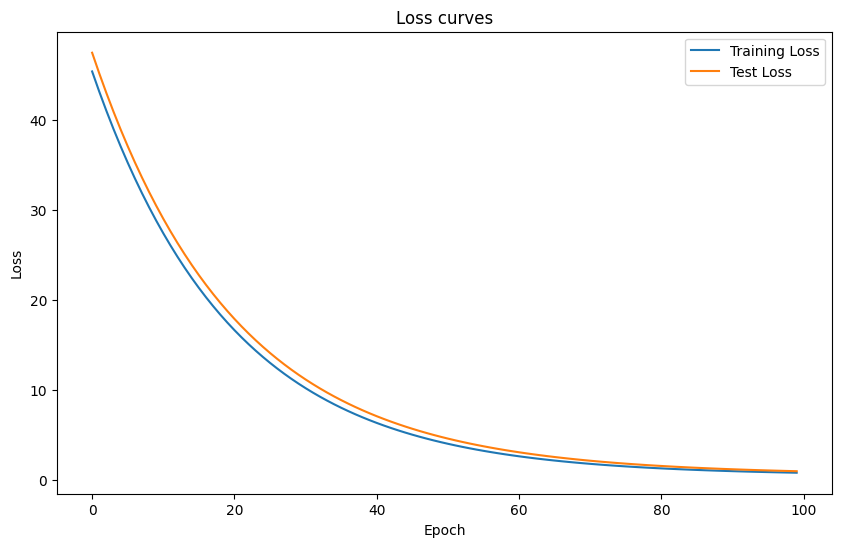

In [43]:
#train the model
n_epochs = 100

for epoch in range(n_epochs):

  model.train() # Switch to training mode
  optimizer.zero_grad() # Zero the gradients

  # Forward pass: compute predicted y by passing x to the model
  y_pred = model(x_train_tensor)

  # Compute loss
  loss = loss_function(y_pred, y_train_tensor)

  # Backward pass: compute gradient of the loss with respect to the model parameters
  loss.backward()

  # Update model parameters
  optimizer.step()

  # Evaluation
  model.eval() # Switch to evaluation mode

  with torch.no_grad():  # Deactivates autograd, reduces memory usage and speeds up computations
    y_pred = model(x_test_tensor) # Forward pass

    test_loss = loss_function(y_pred, y_test_tensor) # Compute the loss

    train_loss_history.append(loss.item())
    test_loss_history.append(test_loss.item())

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss.item():.4f} | Test loss: {test_loss.item():.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label="Training Loss")
plt.plot(test_loss_history, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss curves")
plt.show()
